In [1]:
#!pip install nb_black
%reload_ext nb_black
# autosave every 3 minutes
%autosave 180

Autosaving every 180 seconds


<IPython.core.display.Javascript object>

In [2]:
#!pip install plotly
#!pip install cufflinks

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
# ks_df = pd.read_csv("DSI_kickstarterscrape_dataset.csv", encoding="utf-8")
ks_df = pd.read_csv("data/DSI_kickstarterscrape_dataset.csv", encoding="ISO-8859-1")
ks_df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


<IPython.core.display.Javascript object>

In [5]:
ks_df.shape

(45957, 17)

<IPython.core.display.Javascript object>

In [6]:
ks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

<IPython.core.display.Javascript object>

In [7]:
ks_df.isnull().sum()

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

<IPython.core.display.Javascript object>

There are 12 missing values for pledged data, 59 for reward_levels and 1322 for location.

In [8]:
ks_df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


<IPython.core.display.Javascript object>

#### 1. What is the mean (total) pledge that projects get?

In [9]:
pledged_mean = round(ks_df["pledged"].mean(), 2)
pledged_mean

4980.75

<IPython.core.display.Javascript object>

#### 2. Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?

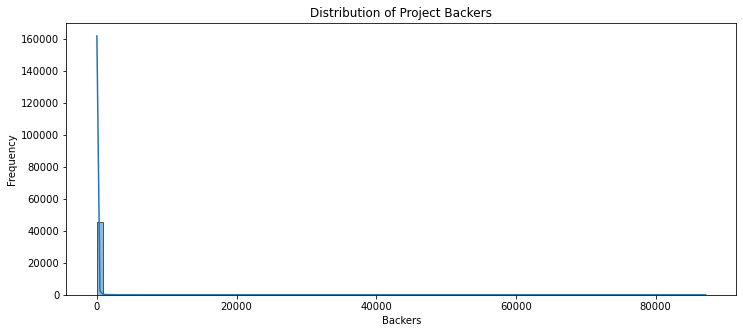

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(12, 5))
sns.histplot(ks_df["backers"], kde=True, bins=100)
plt.xlabel("Backers")
plt.ylabel("Frequency")
plt.title("Distribution of Project Backers")
plt.show()

In [11]:
ks_df["backers"].describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
ks_df.skew(axis=0, skipna=True)

project id            -0.006630
goal                 101.512992
pledged              138.501466
funded percentage    140.811735
backers               87.473974
levels                 2.573258
updates                4.002831
comments              69.315678
duration               1.078027
dtype: float64

<IPython.core.display.Javascript object>

In [13]:
backers_skewness = ks_df["backers"].skew()

print("Skewness:")
print(round(backers_skewness, 2))

Skewness:
87.47


<IPython.core.display.Javascript object>

There are lots of otliers which I will eliminate usint the IQR method.

In [14]:
# calculate 25% and 75% quartiles and IQR = Q3-Q1
Q1 = ks_df.backers.quantile(0.25)
Q3 = ks_df.backers.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(5.0, 59.0, 54.0)

<IPython.core.display.Javascript object>

In [15]:
# calculate min and max thresholds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-76.0, 140.0)

<IPython.core.display.Javascript object>

In [16]:
# outliers
# ks_df[(ks_df.backers < lower_limit) | (ks_df.backers > upper_limit)]

# dataframe w/o outliers
df_no_outlier = ks_df[(ks_df.backers > lower_limit) & (ks_df.backers < upper_limit)]
df_no_outlier.head(2)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18


<IPython.core.display.Javascript object>

In [17]:
df_no_outlier.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.219800e+04,4.219800e+04,42198.000000,42198.000000,42198.000000,42198.000000,42198.000000,42198.000000,42198.000000
mean,1.080646e+09,1.108036e+04,2345.210792,1.751996,30.569695,7.684440,3.376345,2.022774,39.962226
std,6.215546e+08,1.958820e+05,3493.940674,91.953959,32.706435,3.856872,5.411507,4.548671,17.604337
min,3.940900e+04,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.435792e+08,1.500000e+03,150.000000,0.033254,4.000000,5.000000,0.000000,0.000000,30.000000
50%,1.077083e+09,3.500000e+03,1056.000000,0.465000,19.000000,7.000000,1.000000,0.000000,31.860000
75%,1.621537e+09,7.999750e+03,3160.000000,1.088000,47.000000,9.000000,5.000000,2.000000,48.890000
max,2.147460e+09,2.147484e+07,102801.000000,15066.000000,139.000000,76.000000,112.000000,139.000000,91.960000


<IPython.core.display.Javascript object>

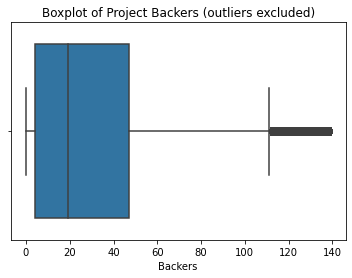

<IPython.core.display.Javascript object>

In [18]:
sns.boxplot(x=df_no_outlier["backers"])
plt.xlabel("Backers")
plt.title("Boxplot of Project Backers (outliers excluded)")
plt.show()

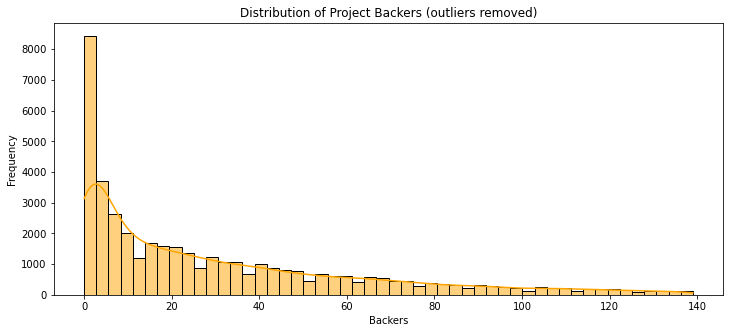

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(df_no_outlier["backers"], kde=True, bins=50, color="orange")
plt.xlabel("Backers")
plt.ylabel("Frequency")
plt.title("Distribution of Project Backers (outliers removed)")
plt.show()

In [20]:
backers_skewness_n = df_no_outlier["backers"].skew()

print("Skewness_wo_outliers:")
print(round(backers_skewness_n, 2))

Skewness_wo_outliers:
1.26


<IPython.core.display.Javascript object>

#### 3. Is the 'duration' variable normally distributed?

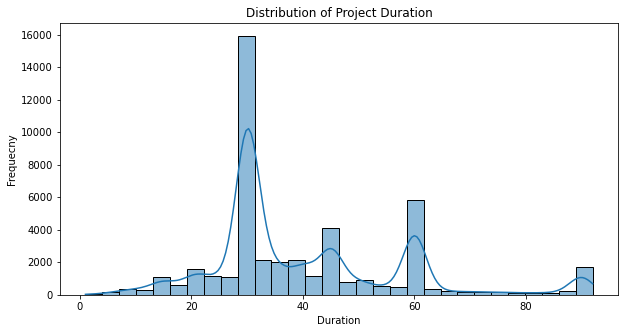

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(ks_df["duration"], kde=True, bins=30)
plt.xlabel("Duration")
plt.ylabel("Frequecny")
plt.title("Distribution of Project Duration")
plt.show()

Duration variable is not normal distributed.

#### 4. If you could collect data on another attribute of these projects, what would it be and why?


There is nothing about marketing presence so a possible new variable can be if there is a FB or Twitter account which can contribute to the marketing campaign. Also of interest might be knowing the targeted audience or even the expected number of customers.

## Qualitative Analysis

<AxesSubplot:ylabel='status'>

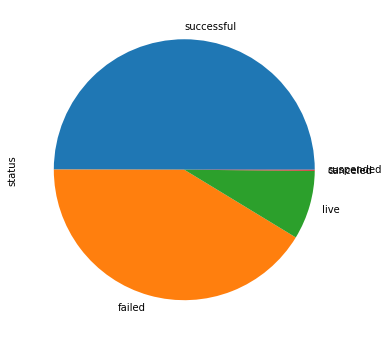

<IPython.core.display.Javascript object>

In [22]:
ks_df.status.value_counts(normalize=True).plot(kind="pie", figsize=(9, 6))
# colors = ["orange", "red", "grey", "darkturquoise", "salmon"]
# status = round(ks_df["status"].value_counts() / len(ks_df["status"]) * 100, 2)

# labels = list(status.index)
# values = list(status.values)

# trace1 = go.Pie(
#     labels=labels,
#     values=values,
#     marker=dict(colors=colors),
#     #    line=dict(color="rgb(100,100,100)", width=1),
# )

# layout = go.Layout(title="Distribuition of Status", legend=dict(orientation="h"))

# fig = go.Figure(data=[trace1], layout=layout)
# iplot(fig)

### What's the best length of time to run a campaign?

In [23]:
# average succsessful project duration
success_duration_avg = ks_df[ks_df["status"] == "successful"].duration.mean()

print("Successful campaign average duration:")
print(round(success_duration_avg, 1))

Successful campaign average duration:
38.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='duration', ylabel='Count'>

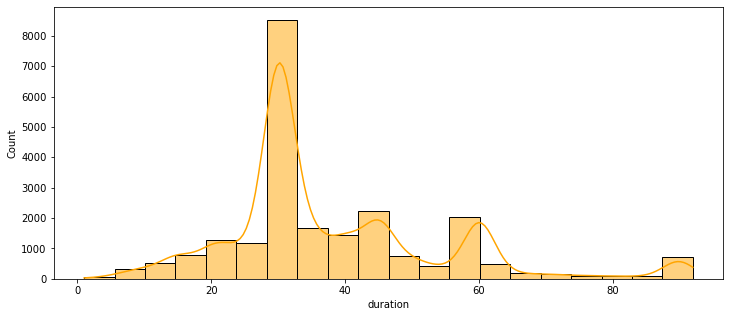

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(12, 5))
sns.histplot(
    data=ks_df[ks_df["status"] == "successful"],
    x="duration",
    bins=20,
    color="orange",
    kde=True,
)

### What's the ideal pledge goal?

In [25]:
# average successful project pledge
success_pledge_goal_avg = ks_df[ks_df["status"] == "successful"].goal.mean()

print("Successful campaign average goal: ")
print(round(success_pledge_goal_avg, 1))

Successful campaign average goal: 
5483.8


<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

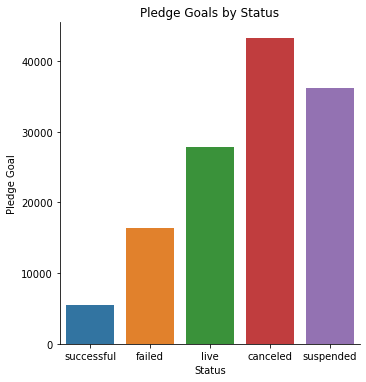

<IPython.core.display.Javascript object>

In [26]:
# Plot showing rates of success by duration

plt.figure(figsize=(12, 6))

sns.catplot(x="status", y="goal", data=ks_df, kind="bar", ci=None)
plt.xlabel("Status")
plt.ylabel("Pledge Goal")
plt.title("Pledge Goals by Status")
plt.show()

### What type of projects would be most successful at getting funded?

In [27]:
# Print categories
ks_df["category"].value_counts()

Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: category, dtype: int64

<IPython.core.display.Javascript object>

Film & video apperas 2 times, one of them is misspelled, needs to be fixed

In [28]:
ks_df["category"] = ks_df["category"].replace(["Film &amp; Video"], "Film & Video")
ks_df["category"].value_counts()

Film & Video    13551
Music           10913
Publishing       4770
Art              3992
Theater          2492
Design           1768
Games            1738
Photography      1514
Food             1439
Fashion          1136
Comics           1072
Technology        811
Dance             761
Name: category, dtype: int64

<IPython.core.display.Javascript object>

There are 14 categories

<AxesSubplot:ylabel='category'>

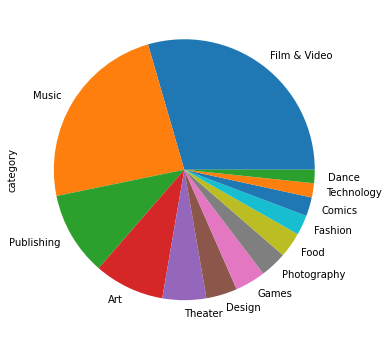

<IPython.core.display.Javascript object>

In [29]:
ks_df.category.value_counts(normalize=True).plot(kind="pie", figsize=(9, 6))
# colors = ["orange", "red", "grey", "darkturquoise", "salmon"]
# category = round(ks_df["category"].value_counts() / len(ks_df["category"]) * 100, 2)

# labels = list(category.index)
# values = list(category.values)

# trace1 = go.Pie(
#     labels=labels,
#     values=values,
#     marker=dict(colors=colors),
#     #    line=dict(color="rgb(100,100,100)", width=1),
# )

# layout = go.Layout(title="Distribuition of Category", legend=dict(orientation="h"))

# fig = go.Figure(data=[trace1], layout=layout)
# iplot(fig)

<AxesSubplot:ylabel='category'>

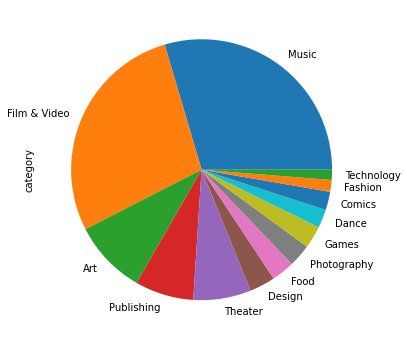

<IPython.core.display.Javascript object>

In [30]:
ks_df[ks_df["status"] == "successful"].category.value_counts(normalize=True).plot(kind="pie", figsize=(9, 6))
#df[df["status"] == "successful"]["category"]

# colors = ["orange", "red", "grey", "darkturquoise", "salmon"]
# category = round(ks_df[ks_df["status"] == "successful"]["category"].value_counts() / len(ks_df[ks_df["status"] == "successful"]) * 100, 2)

# labels = list(category.index)
# values = list(category.values)

# trace1 = go.Pie(
#     labels=labels,
#     values=values,
#     marker=dict(colors=colors),
#     #    line=dict(color="rgb(100,100,100)", width=1),
# )

# layout = go.Layout(title="Distribuition of Category", legend=dict(orientation="h"))

# fig = go.Figure(data=[trace1], layout=layout)
# iplot(fig)


<Figure size 864x432 with 0 Axes>

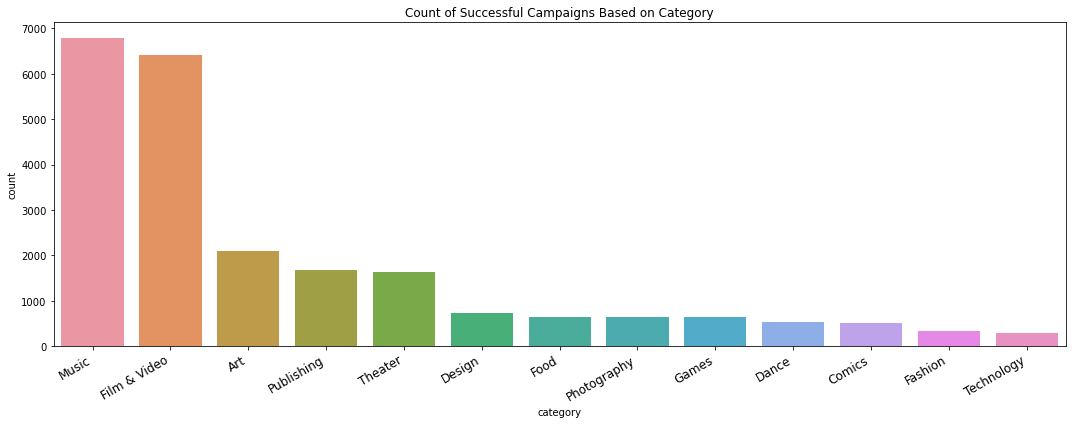

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(12,6))
#sns.countplot(x="category", data=ks_df_success, palette="coolwarm")
#plt.title("Count of Successful Campaigns Based on Category")
#plt.show()

plt.figure(figsize=(15,6))
chart=sns.countplot(
    x='category',
    data=ks_df[ks_df["status"] == "successful"],
    order=ks_df[ks_df["status"] == "successful"]['category'].value_counts().index[:13]
)

chart.set_xticklabels(chart.get_xticklabels(),
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large') 
plt.title('Count of Successful Campaigns Based on Category')
    
plt.tight_layout()


### Is there an ideal month/day/time to launch a campaign?

In [32]:
# Changing the datetime object
ks_df["funded date"] = pd.to_datetime(ks_df["funded date"])

# Extracting Timestamp to generate new columns as Month, Day, Hour and Weekday
# ad_df["Timestamp"].dt.hour
ks_df["funded hour"] = ks_df["funded date"].dt.hour
ks_df["funded month"] = ks_df["funded date"].dt.month
ks_df["funded day no"] = ks_df["funded date"].dt.weekday
ks_df["funded day"] = ks_df["funded date"].dt.day_name()
ks_df["funded year"] = ks_df["funded date"].dt.year

<IPython.core.display.Javascript object>

In [33]:
ks_df.head(2)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,levels,reward levels,updates,comments,duration,funded hour,funded month,funded day no,funded day,funded year
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,19,8,4,Friday,2011
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,5,"$1,$5,$10,$25,$50",6,0,47.18,3,8,0,Monday,2010


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Successful Campaigns by funded hour distribution')

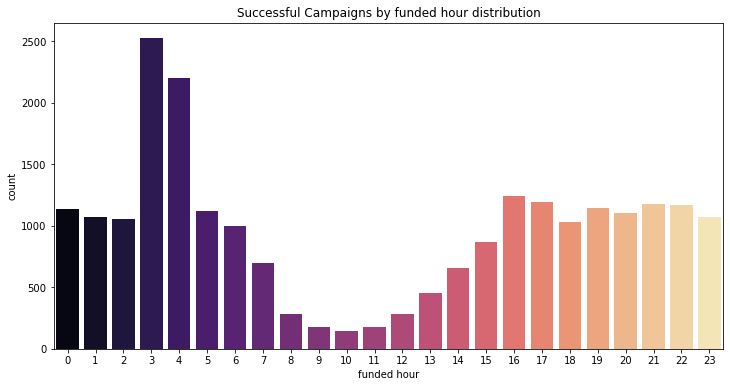

<IPython.core.display.Javascript object>

In [34]:
# Hourly distribution of succsessful campaigns
plt.figure(figsize=(12, 6))
sns.countplot(
    x="funded hour", data=ks_df[ks_df["status"] == "successful"], palette="magma"
)
plt.title("Successful Campaigns by funded hour distribution")

The most uccessful campaigns were funded at 3-4am 

Text(0.5, 1.0, 'Successful Campaigns by funded day distribution')

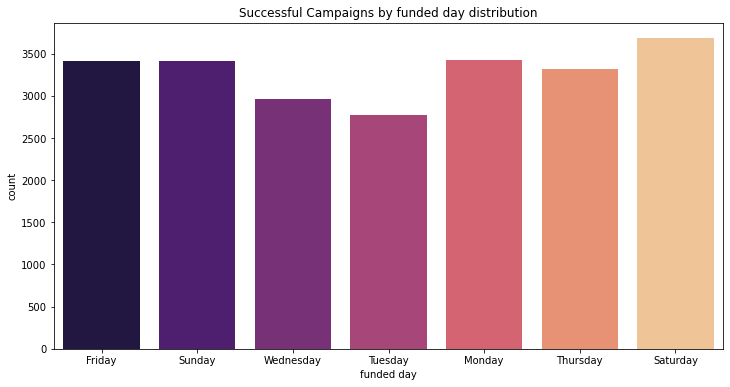

<IPython.core.display.Javascript object>

In [35]:
# Dayly distribution of succsessful campaigns
plt.figure(figsize=(12, 6))
sns.countplot(
    x="funded day", data=ks_df[ks_df["status"] == "successful"], palette="magma"
)
plt.title("Successful Campaigns by funded day distribution")

Not a big difference but he most uccessful campaigns were funded Saturdays.

Text(0.5, 1.0, 'Successful Campaigns by funded month distribution')

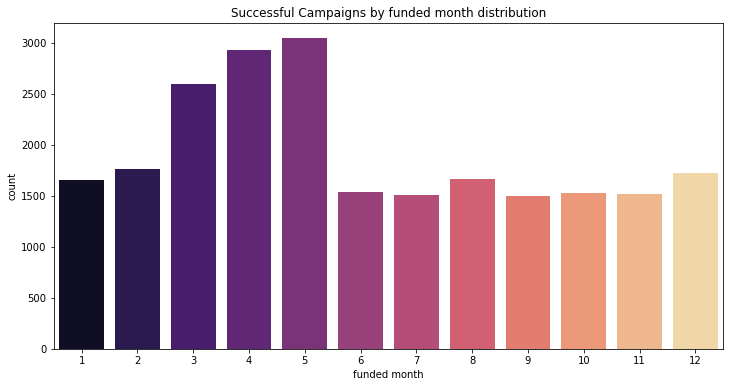

<IPython.core.display.Javascript object>

In [36]:
# Monthly distribution of succsessful campaigns
plt.figure(figsize=(12, 6))
sns.countplot(
    x="funded month", data=ks_df[ks_df["status"] == "successful"], palette="magma"
)
plt.title("Successful Campaigns by funded month distribution")

The most successful campaigns were funded in spring, March - May.

In [37]:
ks_df["funded year"].value_counts()

2011    20182
2012    17822
2010     7253
2009      700
Name: funded year, dtype: int64

<IPython.core.display.Javascript object>

Future analysis might include the location of the campaign- continents, countries, states for US